**INTEGRACION NUMERICA**

Fórmula de los trapecios

In [0]:
def trapecios(f,a,b,m):
    h=(b-a)/m
    s=0
    for i in range(1,m):
        s=s+f(a+i*h)
    r=h/2*(f(a)+2*s+f(b))
    return r

Ejemplo. Probar la función trapecios para integrar $f(x)=sen(x), 0\le x\ge2 $

con 5 trapecios

In [3]:
from math import*
def f(x): return sin(x)
r=trapecios(f,0,2,5)
r

1.3972143342518983

Se puede probar con más trapecios para mejorar la aproximación:

In [4]:
r=trapecios(f,0,2,100)
r

1.4160996313378889

Los resultados tienden hacia el valor exacto a medida que se incrementa el número de trapecios. Estos resultados pueden usarse como criterio de convergencia y para estimar la precisión.

Compare con el resultado calculado con la función integrate de la librería SymPy de Python


In [7]:
from sympy import*
x=Symbol('x')
f=sin(x)
r=integrate(f,(x,0,2))
print(r)  #Respuesta analítica simbólica
#-cos(2) + 1	
r.evalf(6) #	Respuesta numérica con 6 dígitos


-cos(2) + 1


1.41615

Ejemplo. La siguiente función no es integrable analíticamente: 

$\int_{0}^{2}\!\sqrt{x}sen(x)dx$


Use la fórmula de los trapecios para obtener la respuesta aproximada  y estimar el error.


In [11]:
from math import*
def f(x):return sqrt(x)*sin(x)
r=trapecios(f,0,2,20);print(r) #1.5323419014333037
r=trapecios(f,0,2,40);print(r) #1.5325751387611677
r=trapecios(f,0,2,60);print(r) #1.5326151217909427
r=trapecios(f,0,2,80);print(r) #1.5326285905297556
r=trapecios(f,0,2,100);print(r) #1.5326346742219736
r=trapecios(f,0,2,120);print(r) #1.5326379217488284


1.5323419014333037
1.5325751387611677
1.5326151217909427
1.5326285905297556
1.5326346742219736
1.5326379217488284


Estos resultados pueden usarse como criterio de convergencia y para estimar la precisión. El último resultado tiene cinco decimales que no cambian y se pueden considerar correctos.

Compare con el valor calculado con la función integrate de la librería SymPy de Python

In [13]:
from sympy import*
x=Symbol('x')
f=sqrt(x)*sin(x)
r=integrate(f,(x,0,2))
print(r) #-5*sqrt(2)*cos(2)*gamma(5/4)/(4*gamma(9/4))+5*sqrt(2)*sqrt(pi)* fresnelc(2/sqrt(pi))*gamma(5/4)/(8*gamma(9/4))
r.evalf(6) #1.53264

-5*sqrt(2)*cos(2)*gamma(5/4)/(4*gamma(9/4)) + 5*sqrt(2)*sqrt(pi)*fresnelc(2/sqrt(pi))*gamma(5/4)/(8*gamma(9/4))


1.53264

La respuesta analítica en el método de Python es aproximada mediante funciones especiales que requieren desarrollos en series de potencias.

Metodo de Simpson.

In [0]:
def simpson(f, a, b, m):
    h=(b-a)/m
    s=0
    x=a
    for i in range (1,m):
        s=s+2*(i%2+1)*f(x+i*h)		#Coeficientes 4, 2, 4, 2, ...	
    s=h/3*(f(a)+s+f(b))
    return s

Ejemplo. Integrar $f(x)=\sqrt{1+cos^2(x)}  {0\le x\le2}$


 con la fórmula de Simpson iterativamente hasta que el error de truncamiento sea menor que 0.0001

In [23]:
from math import*
def f(x): return sqrt(1+cos(x)**2)
r=simpson(f,0,2,4)
r #2.3504136916156644
r=simpson(f,0,2,8)
r #2.351646207253357
r=simpson(f,0,2,12)
r #2.3516805638227076
r=simpson(f,0,2,16)
print(r) #2.3516862293406477	Respuesta con la precisión requerida

2.3516862293406477


Ejemplo. Encontrar el área entre $f(x) = 4 + cos(x+1)$, y $g(x)=e^x sen(x)$, que incluya el área entre las intersecciones de f y g en el primer cuadrante. Use la Regla de Simpson, m=10.

Graficar las funciones para visualizar las intersecciones:

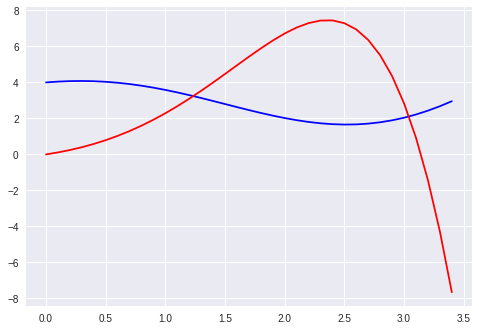

In [24]:
from pylab import*
x=arange(0,3.5,0.1)
f=4+x*cos(x+1)
g=exp(x)*sin(x)
plot(x,f,'b')
plot(x,g,'r')
grid(True)
show()

Las intersecciones son las raíces de la ecuación h(x) = g(x)-f(x) = 0.
El cálculo de las raíces se realiza con el método de la Bisección con E= 0.000001.
Se obtienen las siguientes raíces:

1.233719825744629

3.0406669616699213.

Finalmente se integra:

In [45]:
def h(x): return exp(x)*sin(x)-4-x*cos(x+1)
a=1.233719825744629
b=3.040666961669921
r=simpson(h,a,b,10)
print(r)

6.539105419936795


In [0]:
# Fórmula de Simpson con f simbólica, variable v, y m franjas
def simpsons(f, v, a, b, m):
    h=(b-a)/m
    s=0
    for i in range (1,m):
        s=s+2*(i%2+1)*f.subs(v,a+i*h)		
    s=h/3*(f.subs(v,a)+s+f.subs(v,b))
    return s

Cuadratura de Gauss.

In [0]:
from math import*
def cgauss(f,a,b):
    t0=-(b-a)/2*1/sqrt(3)+(b+a)/2
    t1= (b-a)/2*1/sqrt(3)+(b+a)/2
    s = (b-a)/2*(f(t0) + f(t1))
    return s

In [0]:
def cgaussm(f,a,b,m):
    h=(b-a)/m
    s=0
    x=a
    for i in range(m):
        a=x+i*h
        b=x+(i+1)*h
        s=s+cgauss(f,a,b)
    return s

Usa la cuadratura de Gauss para calcular 

$A=\int_{1}^{2}\!\ xe^xdx$

In [54]:
from math import*
def f(x): return x*exp(x)
s=cgauss(f,1,2)
print(s)

7.3832726466092975


Para mejorar la precisión de ésta fórmula se la puede aplicar más de una vez dividiendo el intervalo de integración en sub-intervalos.

Ejemplo. Aplique dos veces la cuadratura de Gauss en el ejemplo anterior

$A=\int_{1}^{2}\!\ xe^xdx=A_1+A_2=\int_{1}^{1.5}\!\ xe^xdx+\int_{1.5}^{2}\!\ xe^xdx$ 

En cada subintervalo se aplica la cuadratura de Gauss.

In [56]:
s=cgauss(f,1,1.5)+cgauss(f,1.5,2)
print(s)

7.388682930054991


Fórmula de Simpson en dos direcciones.


El método de Simpson para una función de dos variables f(x,y). Primero se integra en la dirección X y después, con los resultados obtenidos, se aplica nuevamente la fórmula de Simpson en la dirección Y.


In [0]:
from sympy import*

def simpson2(f,ax,bx,ay,by,mx,my):
    x=Symbol('x')
    dy=(by-ay)/my
    v=ay
    r=[]
    for i in range (0,my+1):
        def g(x): return f(x,v)
        u=simpson(g,ax,bx,mx)
        r=r+[u]
        v=v+dy
    s=0
    for i in range(1,my):
        s=s+2*(2-(i+1)%2)*r[i]              
    s=dy/3*(r[0]+s+r[my])
    return s


Ejemplo. Calcule   $V=\int_{y=0}^{1}\!\int_{x=0}^{1}\!cos(x^2+y)(x+y)dxdy$

usando la regla de Simpson.

Use m = 4,8,12,… en ambas variables para verificar la convergencia.


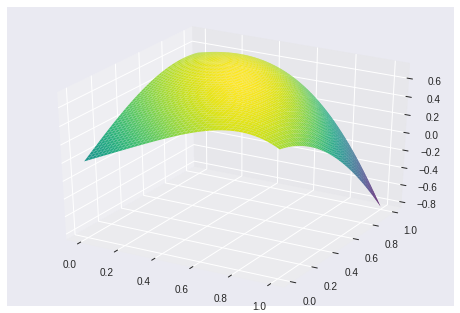

In [1]:
from sympy import*
from sympy.plotting import*
x,y=symbols('x,y')
z=cos(x**2+y)*(x+y)
plot3d(z,(x,0,1),(y,0,1))


Cálculo aproximado del área de figuras cerradas en el plano

Se observa que es una función bien definida y acotada

In [7]:
from math import*
def simpson(f, a, b, m):
    h=(b-a)/m
    s=0
    x=a
    for i in range (1,m):
        s=s+2*(i%2+1)*f(x+i*h)		#Coeficientes 4, 2, 4, 2, ...	
    s=h/3*(f(a)+s+f(b))
    return s

def f(x,y): return cos(x**2+y)*(x+y)
r=simpson2(f,0,1,0,1,4,4);print(float(r))# 0.5004153166122363
r=simpson2(f,0,1,0,1,8,8);print(float(r))# 0.500269266271819
r=simpson2(f,0,1,0,1,12,12);print(float(r))# 0.500258596816339
r=simpson2(f,0,1,0,1,16,16);print(float(r))# 0.5002567143287567
r=simpson2(f,0,1,0,1,20,20);print(float(r))# 0.5002561913044187

0.5004153166122363
0.500269266271819
0.500258596816339
0.5002567143287568
0.5002561913044187


Si se incrementa el número de franjas, el resultado tiende a un valor fijo que esperamos sea el valor del integral.

Nota. Este integral no se puede resolver por métodos analíticos:


In [8]:
from sympy import*
x,y=symbols('x,y')
f=cos(x**2+y)*(x+y)
r=integrate(f,(x,0,1),(y,0,1))
print(r)

Integral((x + y)*cos(x**2 + y), (x, 0, 1), (y, 0, 1))


La librería Sympy de Python en algunos casos usa métodos numéricos para proporcionar una respuesta aproximada y se la puede encontrar evaluando como en este otro ejemplo:


In [10]:
from sympy import*
x,y=symbols('x,y')
f=cos(x+y)+exp(x-y)
r=integrate(f,(x,0,1),(y,0,1))
print(r)
float(r)

-3 + exp(-1) - cos(2) + 2*cos(1) + E


1.5829127179139093

Integrales dobles con puntos singulares.

Ejemplo. Calcule el valor del siguiente integral con la fórmula de Simpson con m = 4 en cada dirección.

   $S=\int_{y=0}^{0.5}\!\int_{x=0}^{0.5}\!\dfrac {e^{y-x}}{x^{1/3}}dxdy$
   
   
Es un integral impropia no integrable analíticamente. Para aplicar la fórmula de Simpson se debe transformar

Sea $u= x^{1/3} ⇒ x = u^3, dx = 3u^2du, x = 0 ⇒ u = 0, x = 0.5 ⇒ u = 0.5^{1/3}$

$S=\int_{y=0}^{0.5}\!\int_{x=0}^{0.5^{1/3}}\!3u{e^{y-u^{3}}}dudy$

Esta función aunque es acotada, no es integrable analíticamente. Ahora se puede integrar numéricamente



In [11]:
from math import*
def f(x,y): return 3*x*exp(y-x**3)
r=simpson2(f,0,0.5**(1/3),0,0.5,4,4);print(float(r))# 0.5075301074265403
r=simpson2(f,0,0.5**(1/3),0,0.5,8,8);print(float(r))# 0.5074524699204189
r=simpson2(f,0,0.5**(1/3),0,0.5,16,16);print(float(r))# 0.5074477527225879

0.5075301074265403
0.5074524699204189
0.5074477527225879


Comparar con el resultado de Python con la librería Sympy aproximado mediante funciones especiales:

In [12]:
from sympy import*
x,y=symbols('x,y')
f=3*x*exp(y-x**3)
r=integrate(f,(x,0,0.5**(1/3)),(y,0,0.5))
print(r)
#0.216240423566709*(-2*gamma(2/3)*lowergamma(2/3,0)+ 2*gamma(2/3)*lowergamma(2/3, 0.5))/gamma(5/3)
float(r)# 0.5074474416154765

0.216240423566709*(-2*gamma(2/3)*lowergamma(2/3, 0) + 2*gamma(2/3)*lowergamma(2/3, 0.5))/gamma(5/3)


0.5074474416154765

Python no puede resolver directamente este integral debido al punto singular:


In [13]:
from sympy import*
x,y=symbols('x,y')
f=exp(y-x)/x**(1/3)
r=integrate(f,(x, 0, 0.5),(y, 0, 0.5))

RecursionError: ignored